## Generate and plot a test dataset

In [ ]:
import numpy as np
from sklearn import datasets
np.random.seed(0)
x,y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

# shift mean and standard deviation (absolute)
x[:,0] = np.abs(x[:,0]*0.5 + 5)
x[:,1] = np.abs(x[:,1]*30 + 160)

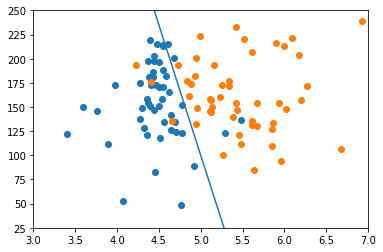

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# plot feature 1 vs feature 2, for class y=0
ax.scatter(x[y==0,0], x[y==0,1])

# plot feature 1 vs feature 2, for class y=1
ax.scatter(x[y==1,0], x[y==1,1])

# try and plot separation line
x1 = np.linspace(3,7.5,100)
x2 = -270*x1 + 1450
plt.plot(x1,x2)

# set axes limits
plt.ylim(25,250)
plt.xlim(3,7)

# show plot
plt.show()

## Make a function to generate a suitable covariance matrix

(40000,)


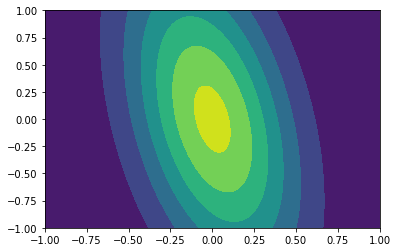

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# covariance matrix function
def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rotangdeg), -np.sin(rotangdeg)], [np.sin(rotangdeg), np.cos(rotangdeg)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.T)
    return covar

# function for generating the meshgrid for plots
def gen_sample_grid(npx = 200, npy = 200, limit =1):
  x1line = np.linspace(-limit,limit, npx)
  x2line = np.linspace(-limit,limit, npy)

  x1grid, x2grid = np.meshgrid(x1line, x2line)

  # produce an grid array with all grid values
  xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T

  return xgrid, x1line, x2line

covar = get_cov(sdx = 1., sdy= 0.1, rotangdeg = 30)
xSamp, x1line, x2line = gen_sample_grid()

# probability density function for the distribution
p = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar))) * np.exp(-1 / 2 * (np.matmul(xSamp, np.linalg.inv(covar)) * xSamp).sum(-1))
print(p.shape)  #output is a flattened grid of probability densities
plt.contourf(x1line, x2line, p.reshape([200,200]))
plt.show()

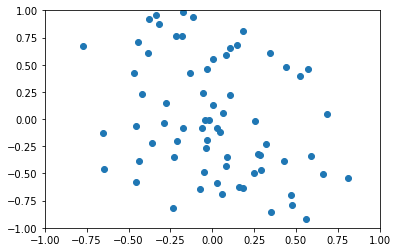

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# based on the distribution above, randomly generate values
mean = np.zeros(2)
rand_distribution = np.random.multivariate_normal(mean, covar, size = 100)
ax.scatter(rand_distribution[:,0], rand_distribution[:,1])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

## Generating a circular distribution

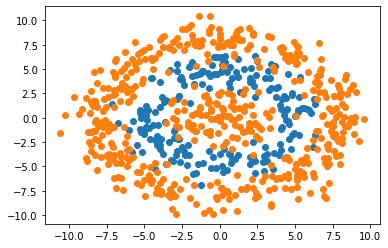

In [5]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

def pol2cart(r, theta):
  x_cart = r*np.cos(theta)
  y_cart = r*np.sin(theta)
  return x_cart,y_cart

# create normal distribution of radius for class 2
r_class2 = np.random.normal(loc = 5, scale = 1, size = 200)
# create normal distribution of radius for class 1 (inner and outer combined)
r_class1 = np.concatenate((np.random.normal(loc = 2, scale = 1, size = 100), np.random.normal(loc = 8, scale = 1, size = 400)))

# convert from polar to cartesian (using uniform distribution of angles)
x_class2, y_class2 = pol2cart(r_class2, np.random.uniform(low = 0, high = 2*np.pi, size = 200))
x_class1, y_class1 = pol2cart(r_class1, np.random.uniform(low = 0, high = 2*np.pi, size = 500))

ax.scatter(x_class2, y_class2)
ax.scatter(x_class1, y_class1)
plt.show()